# Chapter-1: Visualising Cost Function

In this notebook, we'll see how to visualise a cost function for a simple univariant regression model.

## First lets read the data from the file and represent it 

To do that , we follow the following steps:
- Read the data using pandas and create a dataframe
- display the dataframe
- create a scatter plot of the dataframe using matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3d plots

In [3]:
trainingData = pd.read_csv('sampleHouseData.csv')
trainingData.head(10)

,Unnamed: 0,size,price
0,0,2590,795
1,1,2240,915
2,2,2040,950
3,3,3800,1950
4,4,1042,950
5,5,1190,740
6,6,670,460
7,8,1520,565
8,9,2340,699
9,10,1320,899


In [5]:
# Size of training Dataset
m = trainingData['size'].size
m

85

In [7]:
sizeList = np.array(trainingData['size'])
sizeList

array([2590, 2240, 2040, 3800, 1042, 1190,  670, 1520, 2340, 1320, 1800,
       2490, 2650, 2560,  900, 1360,  550, 2974, 1989, 1332, 2668,  770,
       1280, 3200,  889,  508, 3140, 2000,  792, 1690, 3000, 1550,  871,
       1940,  474, 1770, 2510,  750,  573, 1500, 2920, 2817,  617, 1280,
       1523, 1240, 2280, 3590, 2478, 2360,  720, 2480, 1550,  780, 2820,
       2900, 1092, 1731, 1500, 1344, 2320, 2820, 1070, 1113, 2100, 2620,
       1270, 2702, 2031, 2350, 2640, 1340, 1365,  635, 1800,  870, 1510,
       1120, 2580,  875, 2220,  607, 1496, 2670, 1810], dtype=int64)

In [9]:
priceList = np.array(trainingData['price'])
priceList

array([ 795,  915,  950, 1950,  950,  740,  460,  565,  699,  899, 1050,
        936, 1511, 1330,  550,  700,  330, 1750,  980,  845, 1213,  530,
        625, 1275,  680,  325, 1219,  907,  517,  760, 1484,  950,  430,
        520,  335,  805, 1000,  375,  390, 1070,  948,  912,  480,  776,
       1395,  750, 1065, 2350, 1580, 1775,  600,  800, 1100,  750,  865,
       1450,  829,  575,  860,  770,  560,  900,  575,  595,  950, 1300,
        727, 1605, 1480,  888, 1850,  615,  525,  510,  549,  555,  660,
        615, 1635,  420, 1650,  427,  910, 1023,  682], dtype=int64)

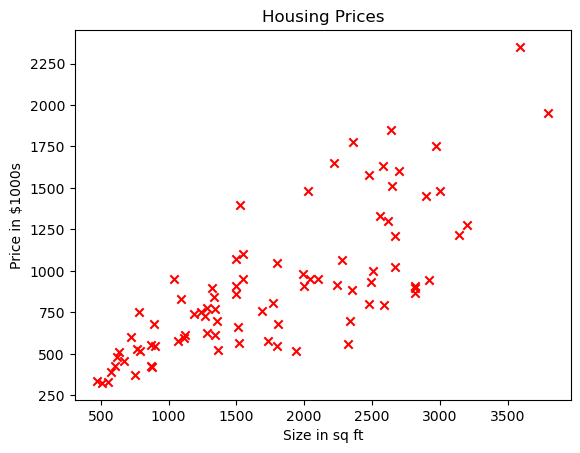

In [11]:
plt.scatter(sizeList, priceList, c='r', marker='x')
plt.title("Housing Prices")
plt.xlabel('Size in sq ft')
plt.ylabel('Price in $1000s')
plt.show()

## Next step is to define the model function:

We are gonna use univariant linear regression, the function for this model is given by <br/>
`F w,b (x) = w*x + b`<br/>
The parameters/weights of the model are w,b<br/>
<br/>
we will use the squared error cost function to find the optimal value of w,b<br/>
The squared error cost function is given by:<br/>
`J (w,b) = (1/2m) {i in range 1 to m}∑ ( F w,b (x^(i)) - y^(i) )`<br/>
or <br/>
`J (w,b) = (1/2m) {i in range 1 to m}∑ ( w*x^(i) + b - y^(i) )`

### First lets simplify things to understand how it works:
To simplify things lets consider `b=0` for the model, and work with only w (so that we can visualise in 2D first)<br/>
Let's consider various values of w and see how the plot comes out<br/>
We will make 2 plots, one is the plot of line on the dataset for various w values, second is the cost function value for each value of w
Lets consider the value of w in range 0 to 1 , for first plot lets consider 10 values 0.1, 0.2, 0.3... 1.0<br/>
for second plot of cost function lets consider 100 values: 0.01,0.02...0.99,1.00

In [13]:
#Model function f
def f(w,x):
    return w*x

def f_list(w):
    return np.array([x*w for x in sizeList])

#Cost Function J
def J(w):
    esq = 0
    for i in range(0,m):
        esq += ( w*sizeList[i] - priceList[i] )**2
    res = (1/(2*m)) * esq
    return res

#### First Plot F w (x) :

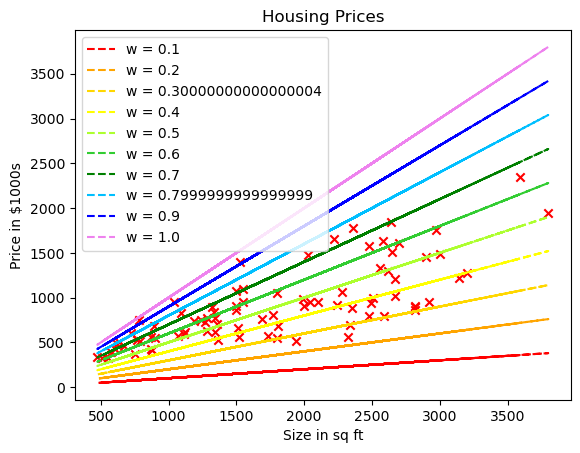

In [15]:
colors = ['red','orange','gold','yellow','greenyellow','limegreen','green','deepskyblue','blue','violet']
plt.scatter(sizeList, priceList, c='r', marker='x')
plt.title("Housing Prices")
plt.xlabel('Size in sq ft')
plt.ylabel('Price in $1000s')
for i in range(0,10):
    w = i/10 + 0.1
    ylist = f_list(w)
    plt.plot(sizeList, ylist, label=f"w = {w}", color = colors[i], linestyle="--")
plt.legend()
plt.show()
    
    

#### Second Plot J(w):

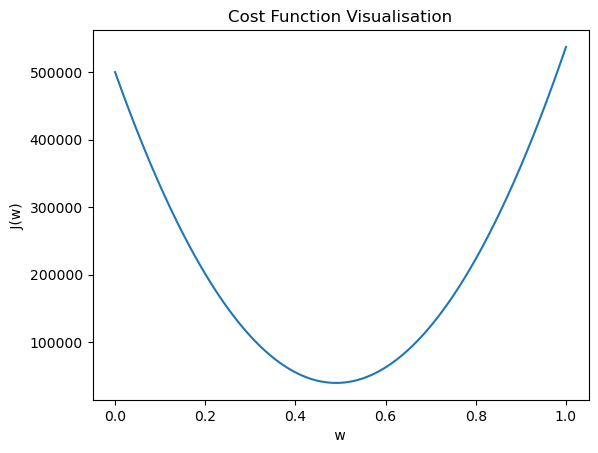

Optimal Value of w is :  0.4903


In [17]:
J_list = []
w_list = []
opt = float('inf')
res = 0
for i in range(1,10001):
    w = i/10000
    tj = J(w)
    w_list.append(w)
    J_list.append(tj)
    if tj<opt:
        opt = tj
        res = w

plt.plot(w_list, J_list)
plt.title("Cost Function Visualisation")
plt.xlabel(" w ")
plt.ylabel(" J(w) ")
plt.show()
print("Optimal Value of w is : ",res)
w_opt = res

#### Now lets use the optimal value of m to make some predictions

# Optimal linear regression function plot:
opt_f_list = np.array([x*w_opt for x in sizeList])
colors = ['red','orange','gold','yellow','greenyellow','limegreen','green','deepskyblue','blue','violet']
plt.scatter(sizeList, priceList, c='r', marker='x')
plt.title("Housing Prices")
plt.xlabel('Size in sq ft')
plt.ylabel('Price in $1000s')
plt.plot(sizeList, opt_f_list, linestyle="--", color="limegreen")
plt.show()

Take user input and make prediction:

Enter Size of House in Sq Ft:  1362


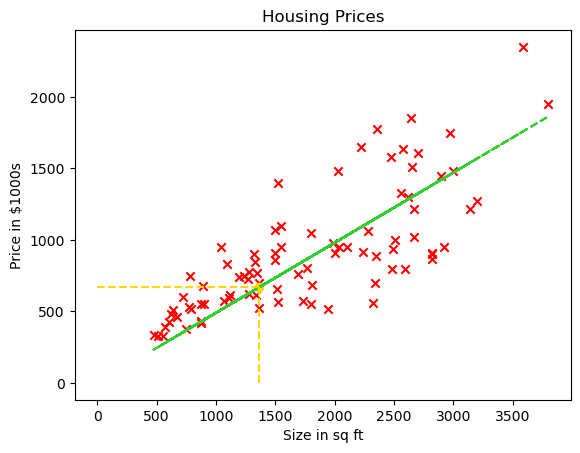

Optimal Price is :  667.7886


In [19]:
inp_size = int(input("Enter Size of House in Sq Ft: "))
inp_size = [inp_size]
opt_f_list = np.array([x*w_opt for x in sizeList])
colors = ['red','orange','gold','yellow','greenyellow','limegreen','green','deepskyblue','blue','violet']
plt.scatter(sizeList, priceList, c='r', marker='x')
plt.title("Housing Prices")
plt.xlabel('Size in sq ft')
plt.ylabel('Price in $1000s')
plt.plot(sizeList, opt_f_list, linestyle="--", color="limegreen")
op_price = [inp_size[0]*w_opt]
plt.vlines(inp_size,0,op_price, linestyle="--", color="gold")
plt.hlines(op_price,0,inp_size, linestyle="--", color="gold")
plt.scatter(inp_size, op_price, color="gold", marker = "o")
plt.show()
print("Optimal Price is : ", op_price[0])

## Now that we understand everything, lets bring back b and see the whole picture

First lets visualise how different value of w and b looks like on the plot

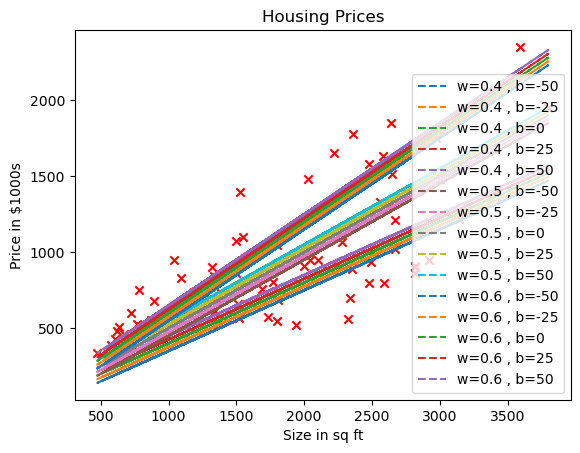

In [21]:
def f(w,b,x):
    return w*x + b

plt.scatter(sizeList, priceList, c='r', marker='x')
plt.title("Housing Prices")
plt.xlabel('Size in sq ft')
plt.ylabel('Price in $1000s')

for i in range(4,7):
    w = i/10
    for j in range(-50,51,25):
        b = j
        ylist = [f(w,b,x) for x in sizeList]
        plt.plot(sizeList, ylist,linestyle="--", label=f"w={w} , b={b}")
plt.legend()
plt.show()
        

Now lets plot the Cost function plot:

In [219]:
w_list = np.array([x/1000 for x in range(200,800)])
b_list = np.array([x for x in range(0,500,10)])

def J(w,b):
    tsum = 0
    for i in range(0,m):
        tsum += ( w*sizeList[i] + b - priceList[i] )**2
    return (1/(2*m)) * tsum

J_vals = np.array([[J(w, b) for w in w_list] for b in b_list])
print(J_vals)

[[200958.12117647 199846.67199312 198739.05769012 ... 219671.18278512
  220849.15717247 222030.96644018]
 [195488.89764706 194395.23528724 193305.40780776 ... 224820.69290276
  226016.45411365 227216.05020488]
 [190119.67411765 189043.79858135 187971.75792541 ... 230070.20302041
  231283.75105482 232501.13396959]
 ...
 [ 52004.61529412  51729.14681665  51457.51321953 ... 569798.15831453
  571812.11340776 573829.90338135]
 [ 51235.39176471  50977.71011076  50723.86333718 ... 579647.66843218
  581679.41034894 583714.98714606]
 [ 50566.16823529  50326.27340488  50090.21345482 ... 589597.17854982
  591646.70729012 593700.07091076]]


In [221]:
W, B = np.meshgrid(w_list, b_list)
print(W)
print("________________")
print(B)

[[0.2   0.201 0.202 ... 0.797 0.798 0.799]
 [0.2   0.201 0.202 ... 0.797 0.798 0.799]
 [0.2   0.201 0.202 ... 0.797 0.798 0.799]
 ...
 [0.2   0.201 0.202 ... 0.797 0.798 0.799]
 [0.2   0.201 0.202 ... 0.797 0.798 0.799]
 [0.2   0.201 0.202 ... 0.797 0.798 0.799]]
________________
[[  0   0   0 ...   0   0   0]
 [ 10  10  10 ...  10  10  10]
 [ 20  20  20 ...  20  20  20]
 ...
 [470 470 470 ... 470 470 470]
 [480 480 480 ... 480 480 480]
 [490 490 490 ... 490 490 490]]


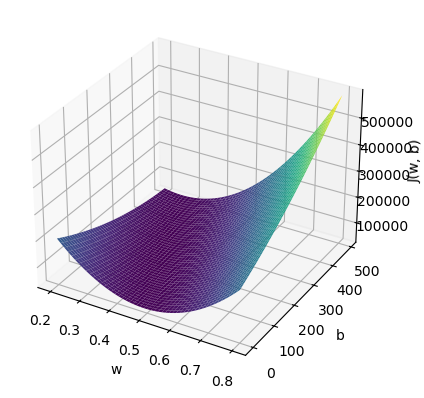

In [223]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J_vals, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w, b)')
plt.show()

A 2D projection of this 3D map (contour map):

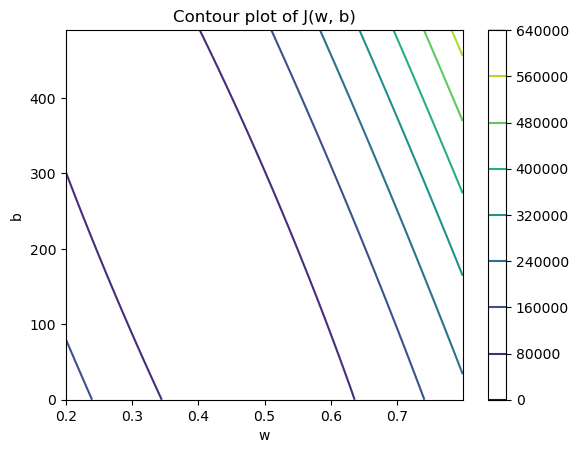

In [225]:
plt.contour(W, B, J_vals)
plt.xlabel('w')
plt.ylabel('b')
plt.title('Contour plot of J(w, b)')
plt.colorbar()
plt.show()

As we can see the value of w matters much more than value of b, which means we can't get a good sence of optimal solution of b,
this is because the sensitivity or accuracy or contour map is acc to the max value of J which increases exponentially <br/>
What we need is a way to have more accuracy or sensitivity for lower values and low accuracy/sensitivity for higher values, this can be achieved by using a logorithmic scaling, which negates the exponential growth of value, by increasing the base of log we increase the sensitivity for lower values <br/>

log base a (b) = log base c (b) / log base c (a)

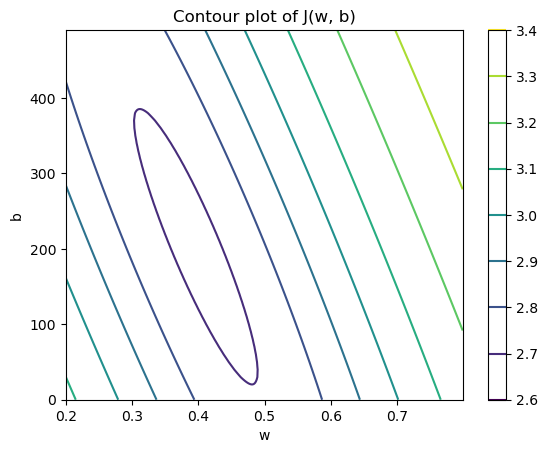

In [231]:
logJ = np.log(J_vals)/np.log(50)
plt.contour(W, B, logJ)
plt.xlabel('w')
plt.ylabel('b')
plt.title('Contour plot of J(w, b)')
plt.colorbar()
plt.show()

From the above contor plot we can get a sence of the optimal values for w and b, which is around 4.5 and 200, although the correct way to get the optimal values of w and b is to use an algorithm such as gradient decent, we'll see that in the future chapter. <br/>
For now, lets plot a line with w=0.43 and b = 180 and see if it looks like a good fit.

Enter Size of House in Sq Ft:  1365


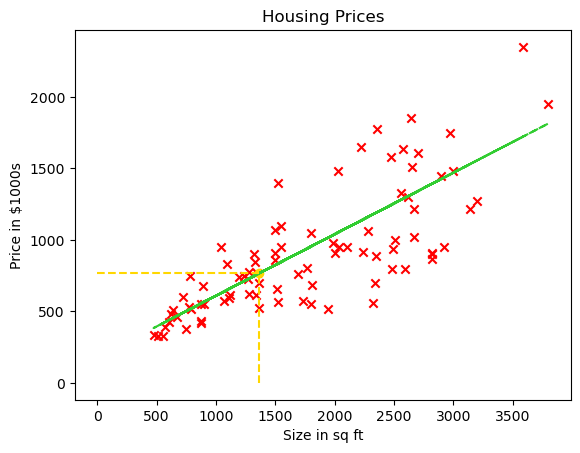

Optimal Price is :  766.95


In [248]:
inp_size = int(input("Enter Size of House in Sq Ft: "))
inp_size = [inp_size]
opt_f_list = np.array([x*0.43 + 180 for x in sizeList]) # w=0.45 b=190
plt.scatter(sizeList, priceList, c='r', marker='x')
plt.title("Housing Prices")
plt.xlabel('Size in sq ft')
plt.ylabel('Price in $1000s')
plt.plot(sizeList, opt_f_list, linestyle="--", color="limegreen")
op_price = [inp_size[0]*0.43 + 180]
plt.vlines(inp_size,0,op_price, linestyle="--", color="gold")
plt.hlines(op_price,0,inp_size, linestyle="--", color="gold")
plt.scatter(inp_size, op_price, color="gold", marker = "o")
plt.show()
print("Optimal Price is : ", op_price[0])